# Telecommunication Customers to Services -  KNN Classification 

## Dataset Collection

In [37]:
import pandas as pd

df=pd.read_csv("telCustomerService.csv")
df.drop(df.columns[0], axis=1, inplace=True)
df


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [41]:
X=df.drop(columns=['custcat'])
y=df['custcat']
X

0      1
1      4
2      3
3      1
4      3
      ..
995    1
996    1
997    4
998    3
999    2
Name: custcat, Length: 1000, dtype: int64

## Data Preprocessing

### Null value removal

In [15]:
df.isnull().sum()

Unnamed: 0    0
region        0
tenure        0
age           0
marital       0
address       0
income        0
ed            0
employ        0
retire        0
gender        0
reside        0
custcat       0
dtype: int64

We dont have any null values so no need of null value remover

In [30]:
# if needed a null remover use the following function


def null_value_removal(arr):
    from sklearn.impute import KNNImputer
    import numpy as np
    
    imputer=KNNImputer(n_neighbors=2)
    new_arr=imputer.fit_transform(arr)
    
    return new_arr

    

### Scalining / Normalizing the data

Either use MinMaxScaler or StandardScaler to normalize the data of each column

eg: 
if x1 ranges from 1-1000 and x2 ranges from 1-10 , there is a huge range difference between each variable that may affect the efficiency of model
so we need to scale it

StandardScaler - scaling by making mean value 0 and std.dev 1
MinMaxScaler   - scaling by making values 0 to 1 (min value =0 and max=1) --> newvalue= old-min/max-min



In [95]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

## Train and Test SPlit

In [50]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.22)

print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)


(780, 11) (220, 11) (780,) (220,)


## Model fitting

In [57]:
from sklearn.neighbors import KNeighborsClassifier

model= KNeighborsClassifier(n_neighbors=4)
model.fit(train_X,train_y)

print(model)


KNeighborsClassifier(n_neighbors=4)


## Prediction

In [60]:
predicted_y=model.predict(test_X)
predicted_y

array([2, 4, 3, 1, 3, 2, 2, 1, 1, 4, 1, 4, 2, 1, 1, 3, 2, 3, 1, 1, 1, 1,
       4, 4, 3, 3, 4, 2, 2, 1, 3, 3, 3, 1, 1, 4, 4, 3, 1, 4, 3, 3, 3, 4,
       3, 3, 4, 1, 4, 1, 1, 2, 3, 3, 4, 1, 2, 3, 4, 2, 3, 2, 1, 1, 2, 3,
       3, 4, 3, 2, 3, 2, 1, 1, 1, 3, 3, 1, 3, 1, 2, 1, 1, 1, 4, 3, 3, 3,
       3, 4, 3, 2, 1, 4, 3, 2, 2, 1, 1, 3, 1, 4, 1, 1, 3, 2, 3, 4, 4, 1,
       1, 1, 3, 1, 2, 1, 1, 1, 2, 4, 1, 3, 1, 2, 4, 3, 3, 3, 4, 2, 1, 4,
       3, 4, 2, 4, 1, 3, 1, 1, 1, 2, 4, 1, 1, 4, 2, 2, 1, 3, 1, 3, 2, 4,
       4, 2, 1, 3, 3, 3, 3, 2, 3, 1, 2, 2, 3, 3, 1, 3, 1, 2, 2, 1, 4, 4,
       4, 1, 3, 1, 3, 3, 3, 1, 4, 1, 1, 1, 2, 2, 1, 1, 1, 4, 4, 1, 4, 1,
       2, 1, 4, 1, 3, 3, 4, 1, 3, 3, 1, 3, 1, 3, 1, 1, 4, 2, 2, 3, 3, 1],
      dtype=int64)

## Accuracy

In [69]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_y,predicted_y))

0.32727272727272727


## K value finding

In [76]:
accuracy=np.zeros(10)
for i in range(1,10):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_y)
    y1=model.predict(test_X)
    accuracy[i]=accuracy_score(test_y,y1)
print(accuracy)
    
    
    

[0.         0.25       0.25909091 0.32272727 0.32727273 0.34090909
 0.33636364 0.32727273 0.34090909 0.35454545]


In [84]:
best_accuracy=accuracy.max()
best_k=accuracy.argmax()
print(f"Best K-Value = {best_k} and accuracy is {best_accuracy}")

Best K-Value = 9 and accuracy is 0.35454545454545455


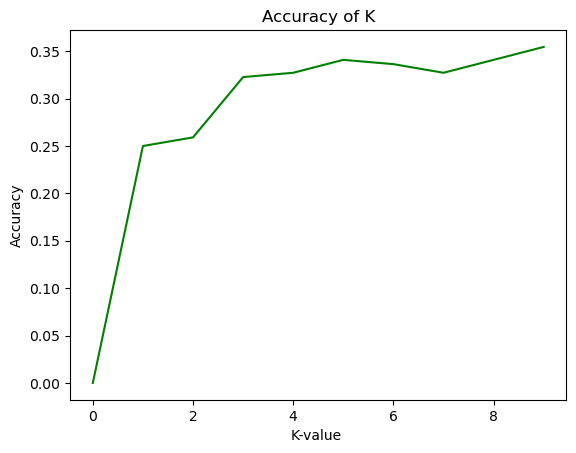

In [90]:
import matplotlib.pyplot as plt

plt.plot(range(0,10),accuracy,color='green')
plt.title("Accuracy of K")
plt.xlabel('K-value ')
plt.ylabel('Accuracy')

plt.show()

## AUTHOR

### Akhil Krishna